# Spotify artist/song recommendation project
The aim of the project is to make different analysis and interpretation of the dataset. And use KNN to classify the songs based to the different caracteristics.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn import utils
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Data cleaning

Nothing to do here, everything seems good.

In [2]:

data = pd.read_csv("hit_songs/Hit Songs/spotify_hits_dataset_complete.csv", sep='\t', parse_dates=True)
print(data.shape)
data.head()

(13880, 24)


,song_id,song_name,artist_id,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,...,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,16GAMmkIzTIT7aH19TtW3f,Show You,['6M25WWmNO7wK1DnKmd3z6R'],['CXLOE'],45,False,Solo,1,1,79,...,4,0.00560,0.636,0.693,0.000604,0.1140,-6.014,0.0647,0.388,96.090
1,0MET90crciVlxlE07ub7Rn,Good Love (feat. Tory Lanez),"['3dKjmeRZcSUw617CoMzEA0', '2jku7tDXc6XoB6MO2h...","['Nafe Smallz', 'Tory Lanez']",58,True,Collaboration,1,2,79,...,3,0.02090,0.614,0.641,0.000000,0.0659,-6.751,0.2880,0.492,123.539
2,7BpYWzZwrsljT1eIjb0TqR,Told You So,['74XFHRwlV6OrjEM0A2NCMF'],['Paramore'],61,False,Solo,3,1,79,...,4,0.00290,0.639,0.814,0.000030,0.0529,-5.632,0.0385,0.904,123.922
3,2GrYIUrAYK5TZhSh0RJV6H,Fantastic Boy,['4Kxlr1PRlDKEB0ekOCyHgX'],['BIGBANG'],0,False,Solo,4,1,0,...,4,0.00231,0.725,0.836,0.000000,0.0927,-3.927,0.0571,0.544,130.053
4,7G7P0AOE4mXWvdSSroLfZA,Told You,['31lnFZEM6ysvjOx59VyxRE'],['Krept & Konan'],0,True,Solo,2,1,0,...,4,0.08830,0.854,0.552,0.000019,0.1510,-7.065,0.0419,0.102,127.966


As we can see, this dataset provide many information of different songs. Such as the popularity, the song artist.

# Selection of the interesting data

The interesting datas are : Song_name, artist name, and the different information about the song, such as the key of the song or bpm.

These are the song informations

In [3]:
song_information = data.iloc[0:25, 12:23]
song_information

,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
0,6,0,4,0.00560,0.636,0.6930,0.000604,0.1140,-6.014,0.0647,0.3880
1,8,0,3,0.02090,0.614,0.6410,0.000000,0.0659,-6.751,0.2880,0.4920
2,2,0,4,0.00290,0.639,0.8140,0.000030,0.0529,-5.632,0.0385,0.9040
3,11,0,4,0.00231,0.725,0.8360,0.000000,0.0927,-3.927,0.0571,0.5440
4,8,1,4,0.08830,0.854,0.5520,0.000019,0.1510,-7.065,0.0419,0.1020
5,7,0,4,0.54100,0.808,0.5800,0.000000,0.1030,-6.339,0.1070,0.2460
6,2,1,4,0.96900,0.150,0.0577,0.363000,0.0873,-21.255,0.0362,0.0701
7,0,0,4,0.50200,0.672,0.5840,0.000037,0.1280,-7.549,0.2970,0.4400
8,11,0,4,0.61000,0.711,0.8480,0.000000,0.1040,-5.368,0.3850,0.2920
9,8,1,4,0.11900,0.756,0.5520,0.000000,0.1040,-6.912,0.0596,0.4000


These are the artists information

In [4]:
artist_information = data.iloc[0:25, 3:11]
print(data["song_name"][0:25])
artist_information

0                                              Show You
1                          Good Love (feat. Tory Lanez)
2                                           Told You So
3                                         Fantastic Boy
4                                              Told You
5                                        Dans mon nuage
6     Main Title "Somewhere in My Memory" (From "Hom...
7                                                 Bulma
8                                               Pankani
9                                                Menace
10                                          Sharp Edges
11                                     C'est moi Mbappé
12                                                fiji*
13                                               Elvira
14                                              La zone
15                                 Se Eu Tiver Solteiro
16                                              Find Me
17                                           Côt

,artist_name,popularity,explicit,song_type,track_number,num_artists,num_available_markets,release_date
0,['CXLOE'],45,False,Solo,1,1,79,2018-08-03
1,"['Nafe Smallz', 'Tory Lanez']",58,True,Collaboration,1,2,79,2019-06-21
2,['Paramore'],61,False,Solo,3,1,79,2017-05-12
3,['BIGBANG'],0,False,Solo,4,1,0,2011-04-08
4,['Krept & Konan'],0,True,Solo,2,1,0,2017-10-20
5,['DTF'],38,True,Solo,3,1,79,2017-05-19
6,"['John Williams', 'Boston Pops Orchestra']",27,False,Collaboration,9,2,78,1970
7,['RK'],42,True,Solo,16,1,79,2019-04-05
8,['Moha La Squale'],41,True,Solo,12,1,79,2018-05-25
9,['PNL'],57,True,Solo,13,1,79,2019-04-05


# Plot some Data

Here is the first graphic information about the song's popularity.

<Axes: >

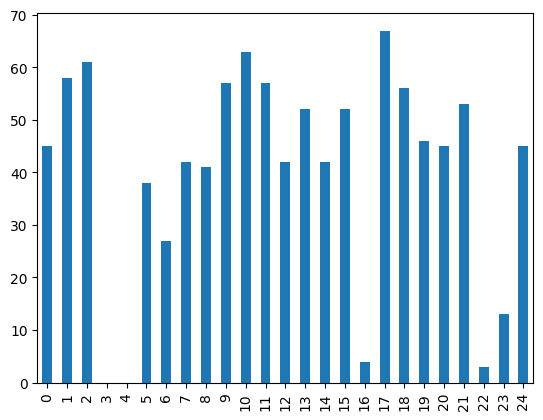

In [5]:
artist_information["popularity"].plot.bar()

This one is about the the technical's details on the songs

<Axes: >

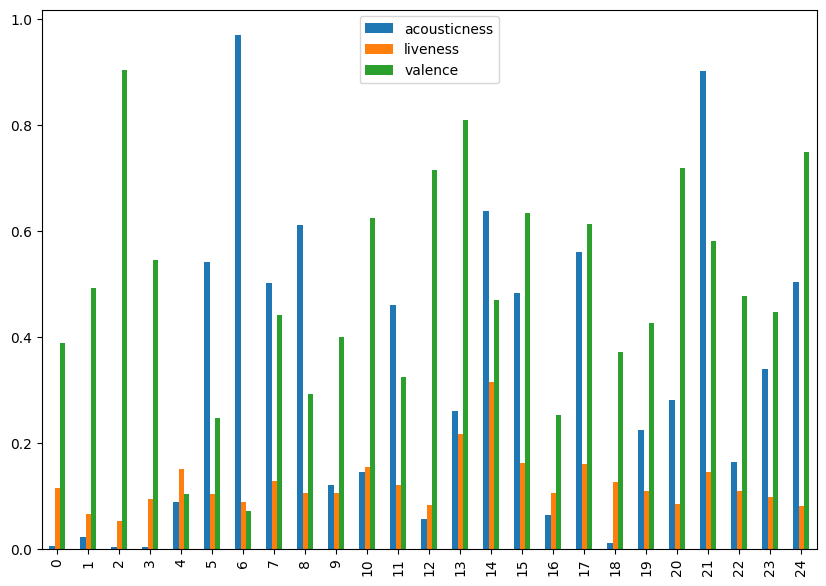

In [6]:
song_information[["acousticness", "liveness", "valence"]].plot.bar(figsize=(10,7))

# Interpretation
We can give an interpretation about these two graphics. 
- The first graphic shows the popularity of each song that we pick up.
- The second graphic shows differents bar which represent (based on 3 caracteristic) the efficiency of each song.


Let's explain these 3 caracteristics: 
1. **acousticness**:

    - Informs the probability of a song to be acoustic or not.


2. **liveness**:

    - Detects the presence of an audience in a song.       
    The higher the liveness value, the higher the        
    probability of a song being performed live.
    
    
3. **valence**:

    - Describes the positiveness within a song.          
      High valence values represent happier songs,        
      whereas low values characterize the opposite.

Finally we can assert that the most popular song on this subdata, which is *côte ouest* **n°17**, is not a liveness song but he's quite **acoustic** and has an average **valence**.
And the less popular songs on this selection has a less probability of acousticsness.

# Classification of the songs

The section is to classify the different song according to their:

1. **danceability**:
    - Combines tempo, rhythm and other elements         
      to inform if a song is suitable for dancing.

2. **mode**:
    - If the song is in the minor key or major key.
3. **energy**:
    - Represents the intensity and activity of a song by     
      combining information such as dynamic range, perceived   
    loudness, timbre, onset rate, and general entropy.

Let's separate in 2 groupe 

<Axes: xlabel='danceability', ylabel='energy'>

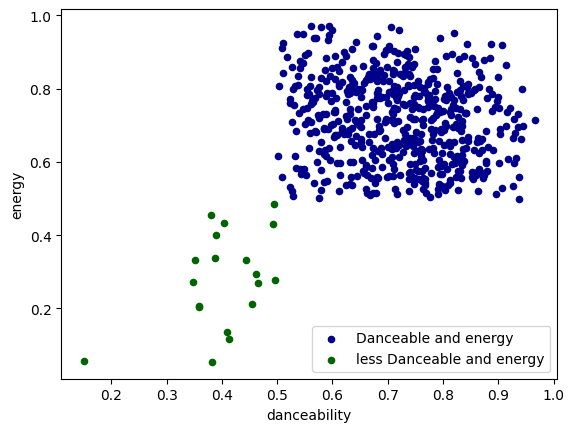

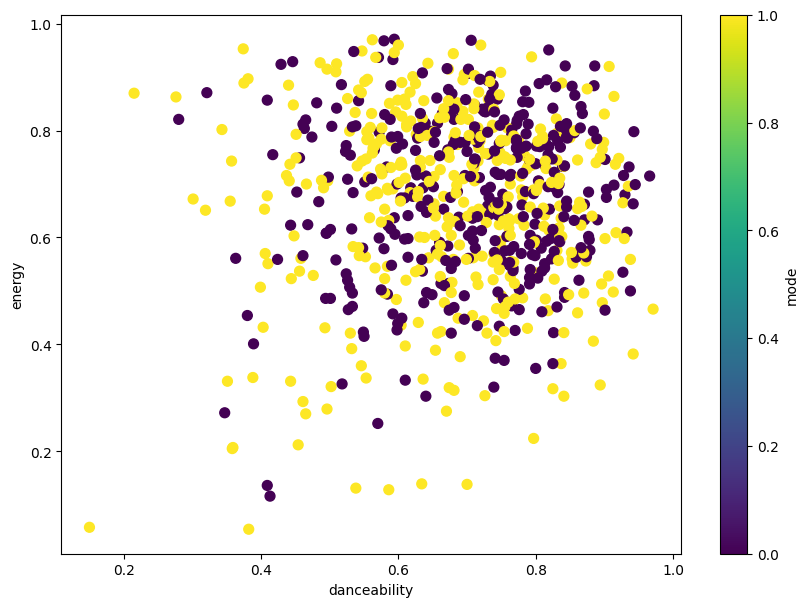

In [7]:
df = data[["mode", "danceability", "energy"]].iloc[0: 750]
df_dance=df[df[["danceability", "energy"]] >= 0.5] # ig the song is "danceable"
df_less_dance=df[df[["danceability", "energy"]] <= 0.5] # if the song is not "danceable" 


ax = df_dance.plot.scatter(x="danceability", y="energy", color="DarkBlue", label="Danceable and energy")
df_less_dance.plot.scatter(x="danceability", y="energy", color="DarkGreen", label="less Danceable and energy", ax=ax)
df.plot.scatter(x="danceability", y="energy", c="mode" ,cmap="viridis", s=50, figsize=(10,7))
#df_dance.head()

# 3D Display

It seems that we don't have a good visualisation of the different caracteristics with the mode, so let's plot it in 3D. But instead we'll use the library plotly.

In [8]:

fig = px.scatter_3d(df, x="danceability", y="energy", z="mode", color="mode")
#fig.show()

![Alt text](images/mode.png)

In [9]:
print(len(df[df["mode"]== 1])) # songs that are in minor key
print(len(df[df["mode"]== 0])) # songs that are in major key

382
368


# Interpretation:
    1. There is much song in the minor key that they are in the major key.
    2. There is more songs that are danceable and energic.

# Conclusion
We've seen that many there is many different interpretation that we can made over the datasets that we got. Furthermore, The interpretation is not a generalisation of "what is the best music". 
A song is always a subjective :).

#

# Machine learning KNN

Let's implement an algorithm using the model KNN with python in order to group the different type of music using 3 caracteristic such as danceability, energy, key.

In [10]:
import numpy as np

Sampling data

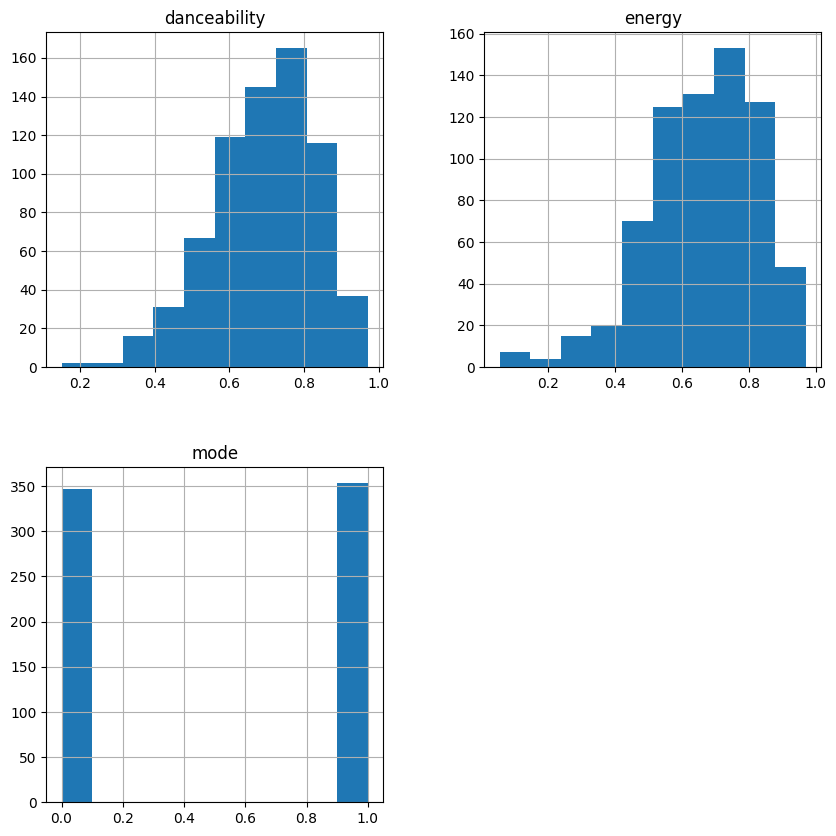

In [11]:
df1 = data[["song_name","danceability", "energy", "mode"]].iloc[0: 700]
df1.to_numpy()
df1.hist(figsize=(10,10))
sample = np.random.randint(df1.shape[0], size=500)
x = df1[["danceability", "energy"]].iloc[sample].to_numpy() # "danceability and energy of the song"
y = df1["mode"].iloc[sample]
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

Train set and test set setting

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y_transformed, train_size=0.8)

training

In [13]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain, ytrain.ravel())

KNeighborsClassifier(n_neighbors=6)

Let's see the error of the model with k = 6

In [14]:
error = 1 - knn.score(xtest,ytest)
print(f"Error = {error}")

Error = 0.43999999999999995


Optimisation of the model

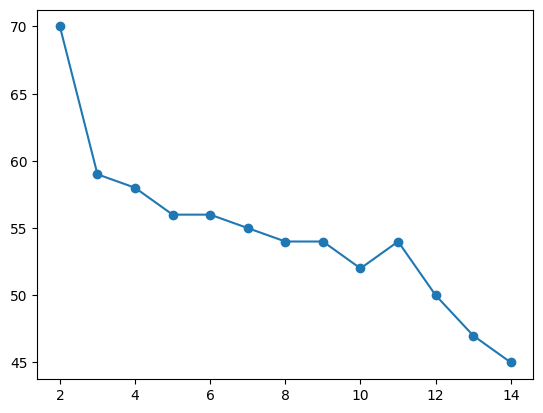

In [15]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(knn.fit(xtrain, ytrain.ravel()).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [16]:
best_k = neighbors.KNeighborsClassifier(n_neighbors=2)
best_k.fit(xtrain, ytrain.ravel())
print(f"Modèle d'entrainement {best_k.score(xtrain,ytrain)}")
predicted = best_k.predict(xtest)
print(f"Best score model now: {best_k.score(xtest, ytest)}")

Modèle d'entrainement 0.83
Best score model now: 0.7


# Visualisation of the decision

In [21]:
ytest=ytest.reshape((ytest.shape[0]))
confusion_matrix(ytest, predicted)
pd.crosstab(ytest, predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,43,7,50
1,23,27,50
All,66,34,100


# The confusion matrix shows us how our model perform. 

As we can see, our model shows up how that he predicted quite well with the datas that we send him above.

Text(0.5, 23.52222222222222, 'Predicted label')

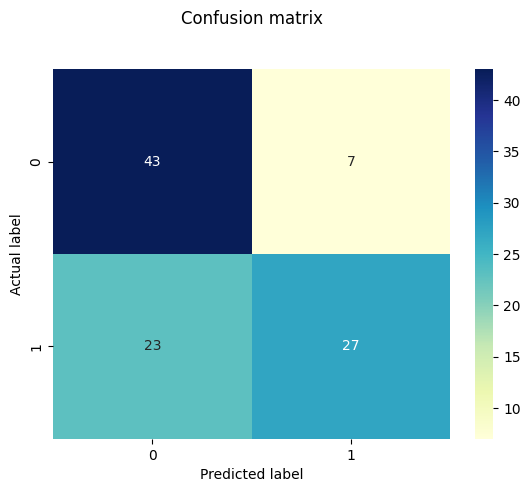

In [22]:
cnf_matrix = metrics.confusion_matrix(ytest,predicted)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

C:\Users\pc\AppData\Local\Temp\ipykernel_8108\2579453258.py:15: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



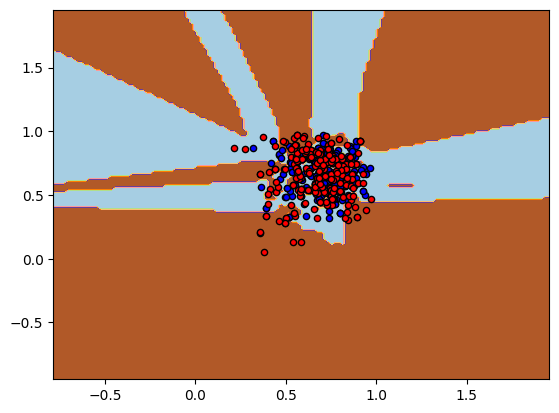

In [25]:

h = .02   
colors = "bry"   
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1   
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1   
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),   
                     np.arange(y_min, y_max, h))   
   
Z = best_k.predict(np.c_[xx.ravel(), yy.ravel()])   
Z = Z.reshape(xx.shape)   
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)   
plt.axis('tight')   
   
for i, color in zip(best_k.classes_, colors):   
    idx = np.where(y == i)   
    plt.scatter(x[idx, 0], x[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20)
